In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iiitdDataset = pd.read_csv('/content/drive/My Drive/BTP AQI/Ahmedabad AQI.csv')
iiitdDataset.columns = ['Date', 'PM2.5','PM10', 'O3', 'NO2', 'SO2','CO']
maxPM = iiitdDataset[['PM2.5','PM10']].max(axis=1)
aqiColumn = maxPM + iiitdDataset['O3'] + iiitdDataset['NO2'] + iiitdDataset['SO2'] + iiitdDataset['CO']
iiitdDataset['AQI'] = aqiColumn
iiitdDataset['AQI'].values[iiitdDataset['AQI'] > 999] = 999

In [ ]:
iiitdDataset

,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,01-01-2018,168,168,77,35,46,8,334
1,02-01-2018,162,162,78,32,33,7,312
2,03-01-2018,149,149,138,46,48,16,397
3,04-01-2018,163,163,29,80,50,12,334
4,05-01-2018,160,160,38,65,52,13,328
...,...,...,...,...,...,...,...,...
809,01-12-2020,148,125,43,51,12,14,268
810,02-12-2020,157,121,35,58,9,14,273
811,03-12-2020,156,186,39,57,17,18,317
812,04-12-2020,171,311,24,73,17,26,451


In [ ]:
iiitdDataset.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,131.443489,104.071253,42.420147,32.438575,26.955774,8.936118,243.875921
std,39.708360,50.942602,48.914468,20.930402,23.143873,6.899799,79.748224
min,32.000000,7.000000,1.000000,4.000000,2.000000,1.000000,99.000000
25%,101.000000,67.000000,24.000000,15.000000,10.000000,5.000000,187.000000
50%,130.000000,86.000000,34.000000,28.000000,21.000000,7.000000,238.000000
75%,158.000000,142.000000,43.000000,45.750000,39.000000,11.750000,283.000000
max,298.000000,385.000000,500.000000,101.000000,206.000000,50.000000,613.000000


In [ ]:
iiitdDataset['Date'] = pd.to_datetime(iiitdDataset['Date'])

In [ ]:
# We divided that data for analysis into 3 specific groups - Yearly (2018, 2019, 2020), Monthly (Jan to Dec) and then before, during and after the Lockdown (2020). Our analysis is as follows and is presented in the plots below:

# 	PM2.5 and PM10 values show a seasonal effect, with pollution being higher in winter as compared to summer.There is a clear trend that pollution level in Delhi and Ahmedabad falls in the month of July and August. This might be majorly because monsoon season sets in during these months leading to wet deposition and air scrubbing by rainfall.

# 	The pollution level then start rising and reach highest levels in winter months. The months of April-May is considered as the peak crop harvesting month (leading to increase in NO2 levels due to higher fertiliser use) and during the winter months like November-December a lot of the crop residue burning takes place, especially in northern parts of India (leading to higher PM2.5 and PM10 levels).

# 	The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately due to the pandemic and hopefully due to public awareness as well.

# 	The Sulphur Dioxide (SO2) Levels is constantly increasing in Delhi.  This can take place due to SO2 emission hotspots being created from increasing number of thermal power stations.

# 	There is an yearly reduction in Nitrogen Dioxide (NO2) and Sulphur Dioxide (SO2) at Ahmedabad. This may be due to the vehicle emission standards introduced by the government, the increasing use of LPG as domestic fuel instead of coal or fuelwood and also the use of CNG instead of diesel in certain vehicles.

# 	During the lockdown a clear decrease in Pollutants was observed at both Ahmedabad and Delhi. In 2020, The mean value of AQI at IIIT Delhi was 238.35 before the Lockdown, 177.13 during the lockdown and 218.11 after the lockdown. Similarly for Ahmedabad the mean AQI was 211.48 before the lockdown, 175.23 during the lockdown and 219.66 after the lockdown.

In [ ]:
def trend_plot(dataframe,value):
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2018, 2020]), :])

    # Set Title
    axes[0].set_title('Yearly Box Plot\n(Trend)', fontsize=13); 
    axes[1].set_title('Monthly Seasonality Plot', fontsize=13)
    plt.show()

In [ ]:
iiitdDataset.reset_index(inplace=True)

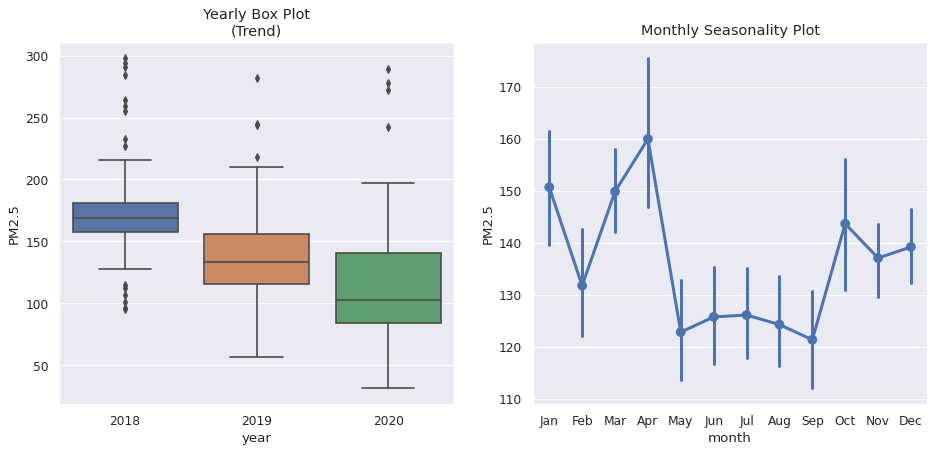

In [ ]:
df = iiitdDataset.copy()
value='PM2.5'
trend_plot(df,value)

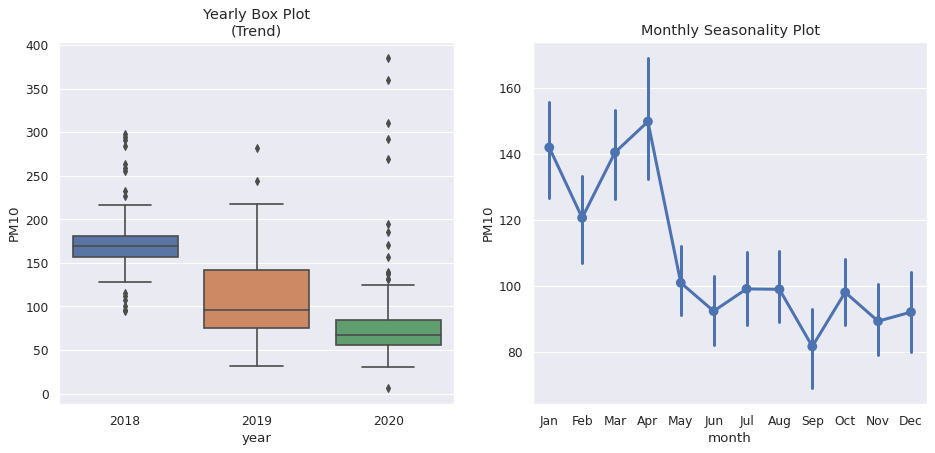

In [ ]:
df = iiitdDataset.copy()
value='PM10'
trend_plot(df,value)

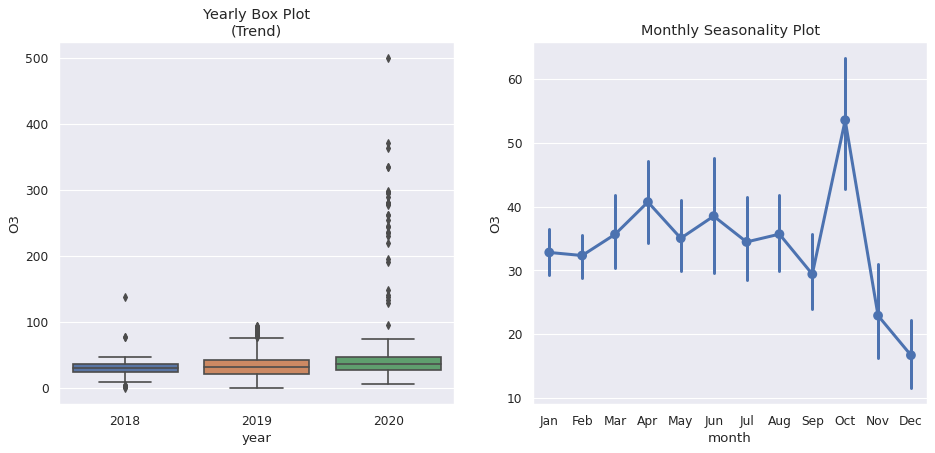

In [ ]:
df = iiitdDataset.copy()
value='O3'
trend_plot(df,value)

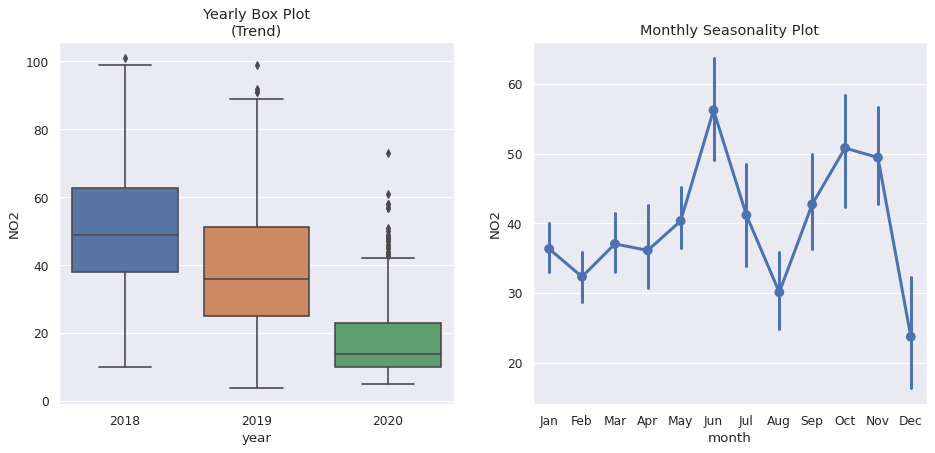

In [ ]:
df = iiitdDataset.copy()
value='NO2'
trend_plot(df,value)

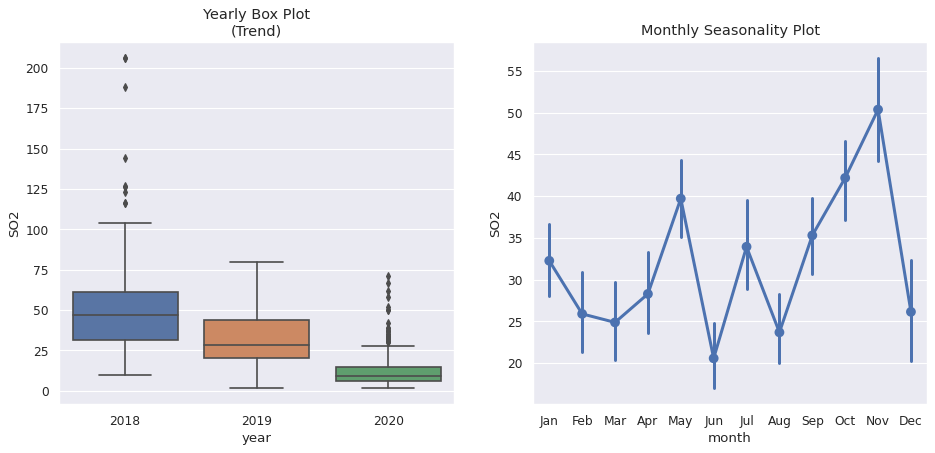

In [ ]:
df = iiitdDataset.copy()
value='SO2'
trend_plot(df,value)

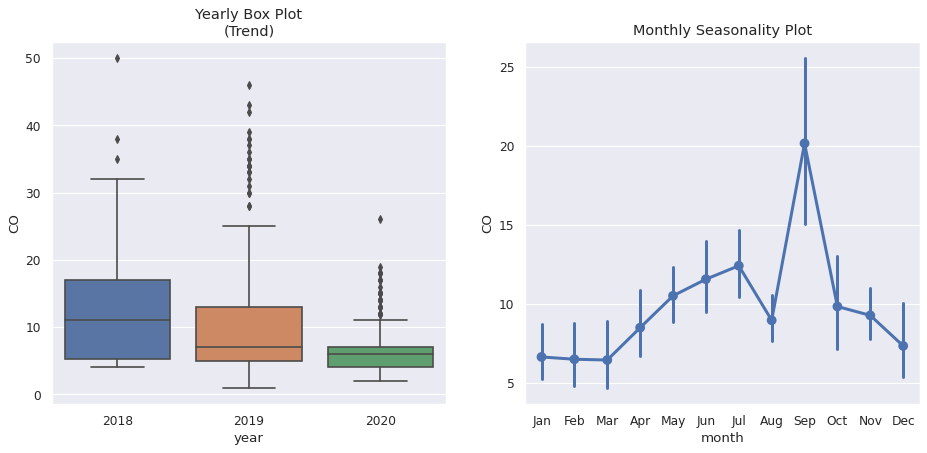

In [ ]:
df = iiitdDataset.copy()
value='CO'
trend_plot(df,value)

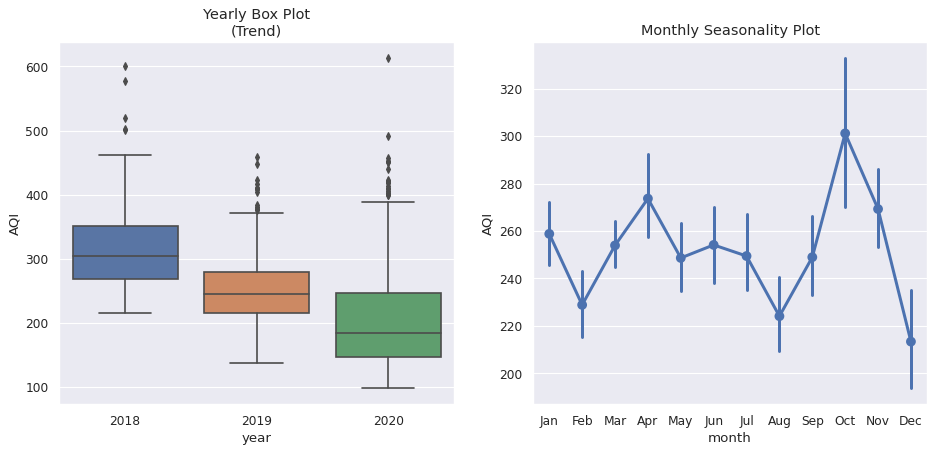

In [ ]:
df = iiitdDataset.copy()
value='AQI'
trend_plot(df,value)

In [ ]:
pollutants = ['PM2.5','PM10', 'O3', 'NO2', 'SO2','CO']

In [ ]:
iiitdDataset2 = iiitdDataset[iiitdDataset['Date'] >= '2020-01-01'] #2020 - Before and After Lockdown
iiitdDataset2 = iiitdDataset2.sort_values(by=['Date'])

In [ ]:
iiitdDataset2

,index,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
474,474,2020-01-01,162,87,9,6,11,7,195
505,505,2020-01-02,136,70,10,17,16,6,185
534,534,2020-01-03,128,98,23,28,35,9,223
565,565,2020-01-04,79,67,32,12,8,2,133
595,595,2020-01-05,85,53,54,6,12,4,161
...,...,...,...,...,...,...,...,...,...
667,667,2020-12-07,82,62,296,11,9,5,403
698,698,2020-12-08,82,45,138,9,6,8,243
729,729,2020-12-09,82,45,23,13,6,5,129
759,759,2020-12-10,151,91,36,50,11,8,256


In [ ]:
iiitdDataset2.set_index('Date',inplace=True)

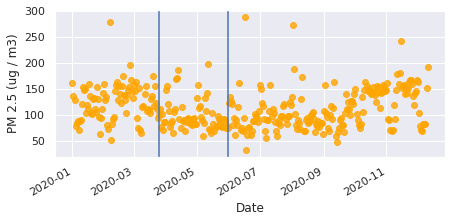

In [ ]:
import datetime as dt

axes = iiitdDataset2['PM2.5'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), color='orange', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('PM 2.5 (ug / m3)') #Micrograms per Cubic Meter of Air
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

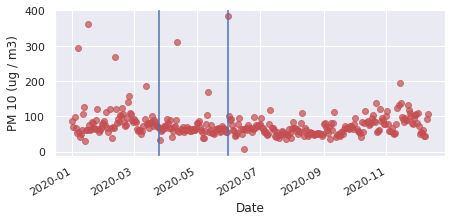

In [ ]:
axes = iiitdDataset2['PM10'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), subplots = True, color='r')
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('PM 10 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

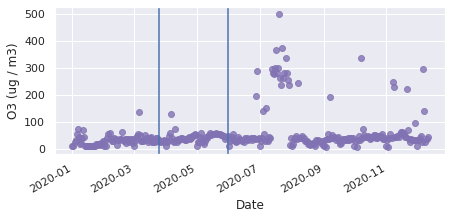

In [ ]:
axes = iiitdDataset2['O3'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), subplots=True, color='m')
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('O3 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

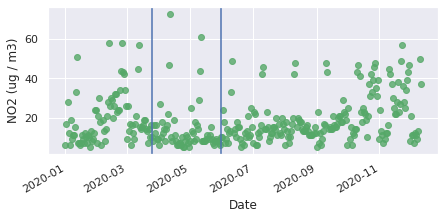

In [ ]:
axes = iiitdDataset2['NO2'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), color='g', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('NO2 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

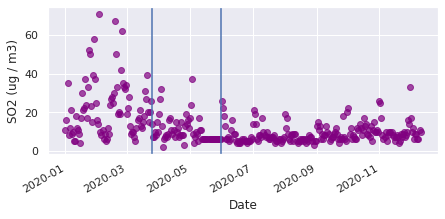

In [ ]:
axes = iiitdDataset2['SO2'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='purple', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('SO2 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

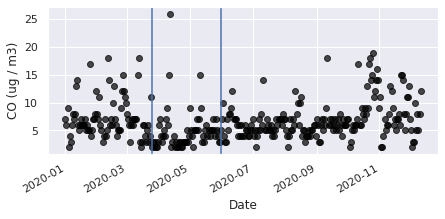

In [ ]:
axes = iiitdDataset2['CO'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='black', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('CO (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

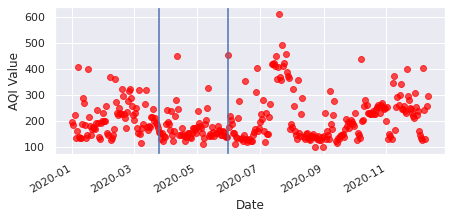

In [ ]:
axes = iiitdDataset2['AQI'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='red', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('AQI Value')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

In [ ]:
iiitdDataset2.reset_index(inplace=True)

In [ ]:
iiitdDataset2 = iiitdDataset2.drop(columns=['index'])

In [ ]:
iiitdDataset2

,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,2020-01-01,162,87,9,6,11,7,195
1,2020-01-02,136,70,10,17,16,6,185
2,2020-01-03,128,98,23,28,35,9,223
3,2020-01-04,79,67,32,12,8,2,133
4,2020-01-05,85,53,54,6,12,4,161
...,...,...,...,...,...,...,...,...
335,2020-12-07,82,62,296,11,9,5,403
336,2020-12-08,82,45,138,9,6,8,243
337,2020-12-09,82,45,23,13,6,5,129
338,2020-12-10,151,91,36,50,11,8,256


In [ ]:
AQI_before_Lockdown = iiitdDataset2[(iiitdDataset2['Date'] >= '2020-01-01') & (iiitdDataset2['Date'] <= '2020-03-24')]
AQI_during_Lockdown = iiitdDataset2[(iiitdDataset2['Date'] >= '2020-03-25') & (iiitdDataset2['Date'] <= '2020-05-31')]
AQI_after_Lockdown = iiitdDataset2[iiitdDataset2['Date'] >= '2020-06-01']

In [ ]:
AQI_before_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000
mean,124.761905,89.369048,30.452381,19.369048,22.238095,7.202381,211.47619
std,34.979381,49.579383,18.919872,12.770240,14.749000,3.603144,64.59111
min,51.000000,31.000000,9.000000,5.000000,4.000000,2.000000,115.00000
25%,102.750000,65.000000,18.750000,10.000000,11.000000,5.000000,168.50000
50%,128.000000,79.000000,29.000000,15.500000,19.000000,6.000000,197.00000
75%,148.500000,93.250000,38.250000,26.000000,30.000000,8.000000,241.00000
max,278.000000,360.000000,134.000000,58.000000,71.000000,18.000000,409.00000


In [ ]:
AQI_during_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,98.220588,74.264706,41.264706,13.500000,10.397059,4.852941,175.235294
std,29.571490,51.555395,16.539070,12.223662,6.448741,3.649840,61.839010
min,60.000000,33.000000,9.000000,5.000000,2.000000,2.000000,110.000000
25%,79.000000,58.000000,30.750000,8.000000,6.000000,3.000000,143.000000
50%,89.000000,63.500000,39.000000,9.000000,8.000000,4.000000,155.000000
75%,107.250000,70.250000,50.250000,14.000000,13.000000,5.000000,179.500000
max,197.000000,385.000000,129.000000,73.000000,37.000000,26.000000,452.000000


In [ ]:
AQI_after_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,112.175532,70.377660,71.414894,19.632979,8.973404,6.989362,219.659574
std,39.235693,24.145524,89.880540,11.880347,4.813565,3.376530,93.552759
min,32.000000,7.000000,6.000000,5.000000,3.000000,2.000000,99.000000
25%,82.000000,52.750000,31.000000,11.750000,6.000000,5.000000,142.000000
50%,102.000000,66.000000,38.000000,15.000000,7.000000,6.000000,201.500000
75%,142.250000,82.250000,48.000000,23.000000,10.000000,8.000000,258.250000
max,289.000000,195.000000,500.000000,57.000000,33.000000,19.000000,613.000000


In [ ]:
iiitdDataset

,index,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,0,2018-01-01,168,168,77,35,46,8,334
1,1,2018-02-01,162,162,78,32,33,7,312
2,2,2018-03-01,149,149,138,46,48,16,397
3,3,2018-04-01,163,163,29,80,50,12,334
4,4,2018-05-01,160,160,38,65,52,13,328
...,...,...,...,...,...,...,...,...,...
809,809,2020-01-12,148,125,43,51,12,14,268
810,810,2020-02-12,157,121,35,58,9,14,273
811,811,2020-03-12,156,186,39,57,17,18,317
812,812,2020-04-12,171,311,24,73,17,26,451


In [ ]:
iiitdDataset2 = iiitdDataset[(iiitdDataset['Date'] >= '2020-03-25') & (iiitdDataset['Date'] <= '2020-05-31')] #2020 - Before and After Lockdown

iiitdDataset3 = iiitdDataset[(iiitdDataset['Date'] >= '2019-03-25') & (iiitdDataset['Date'] <= '2019-05-31')] #2019 - Same Time

iiitdDataset2 = iiitdDataset2.sort_values(by=['Date'])

iiitdDataset3 = iiitdDataset3.sort_values(by=['Date'])

iiitdDataset2.set_index('Date',inplace=True)

iiitdDataset3.set_index('Date',inplace=True)

iiitdDataset2 = iiitdDataset2.drop(columns=['index'])

iiitdDataset3 = iiitdDataset3.drop(columns=['index'])

In [ ]:
iiitdDataset2

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
Date,,,,,,,
2020-03-25,99,67,32,10,14,2,157
2020-03-26,111,33,26,8,7,3,155
2020-03-27,77,59,30,16,7,2,132
2020-03-28,101,61,29,12,10,3,155
2020-03-29,71,67,26,16,8,2,123
...,...,...,...,...,...,...,...
2020-05-27,91,65,46,8,6,5,156
2020-05-28,88,63,37,8,6,4,143
2020-05-29,75,55,45,7,6,3,136


In [ ]:
iiitdDataset3

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
Date,,,,,,,
2019-03-25,148,148,40,40,30,5,263
2019-03-26,154,154,53,40,33,4,284
2019-03-27,152,152,37,41,40,4,274
2019-03-28,190,190,20,28,21,3,262
2019-03-29,204,204,15,31,4,5,259
...,...,...,...,...,...,...,...
2019-05-27,137,101,37,47,51,15,287
2019-05-28,123,93,34,32,38,13,240
2019-05-29,107,100,39,41,55,13,255


In [ ]:
iiitdDataset2['Month'] = iiitdDataset2.index.to_series().dt.strftime('%b')
iiitdDataset3['Month'] = iiitdDataset3.index.to_series().dt.strftime('%b')

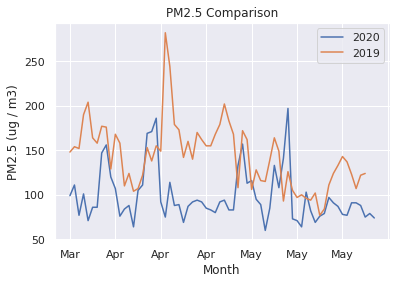

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='PM2.5', label='2020')
ax = iiitdDataset3.plot(x='Month', y='PM2.5', label='2019', ax=ax)
ax.set_ylabel('PM2.5 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('PM2.5 Comparison')
plt.show()

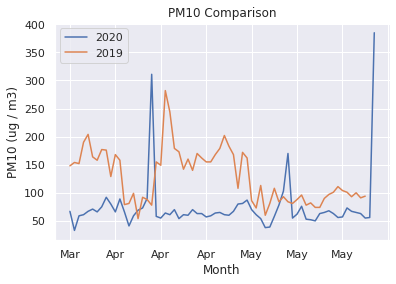

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='PM10', label='2020')
ax = iiitdDataset3.plot(x='Month', y='PM10', label='2019', ax=ax)
ax.set_ylabel('PM10 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('PM10 Comparison')
plt.show()

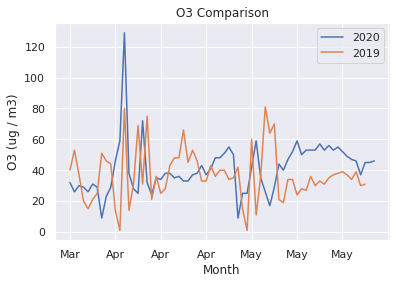

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='O3', label='2020')
ax = iiitdDataset3.plot(x='Month', y='O3', label='2019', ax=ax)
ax.set_ylabel('O3 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('O3 Comparison')
plt.show()

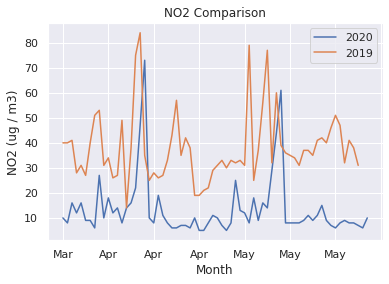

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='NO2', label='2020')
ax = iiitdDataset3.plot(x='Month', y='NO2', label='2019', ax=ax)
ax.set_ylabel('NO2 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('NO2 Comparison')
plt.show()

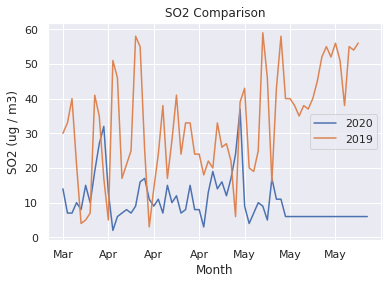

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='SO2', label='2020')
ax = iiitdDataset3.plot(x='Month', y='SO2', label='2019', ax=ax)
ax.set_ylabel('SO2 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('SO2 Comparison')
plt.show()

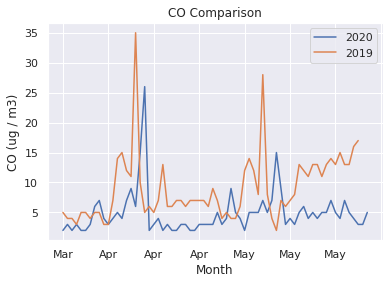

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='CO', label='2020')
ax = iiitdDataset3.plot(x='Month', y='CO', label='2019', ax=ax)
ax.set_ylabel('CO (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('CO Comparison')
plt.show()

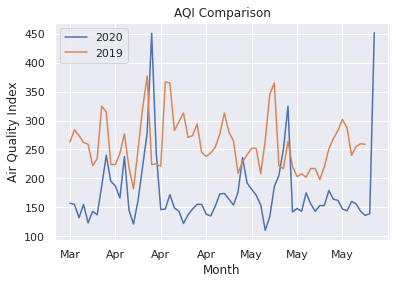

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='AQI', label='2020')
ax = iiitdDataset3.plot(x='Month', y='AQI', label='2019', ax=ax)
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Month')
ax.set_title('AQI Comparison')
plt.show()